<a href="https://www.kaggle.com/code/aleksandrmorozov123/python-mathematical-modelling?scriptVersionId=138929320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

***This notebook about math modeling***

A real-valued normal variable X is often described by means of its cumulative distribution function (CDF):
$$F_x (x) := \mathbb {P} [X \leq x]$$
and its probability density function (PDF):
$$f_x(x) := \frac {d} {dx} F_X (x) $$



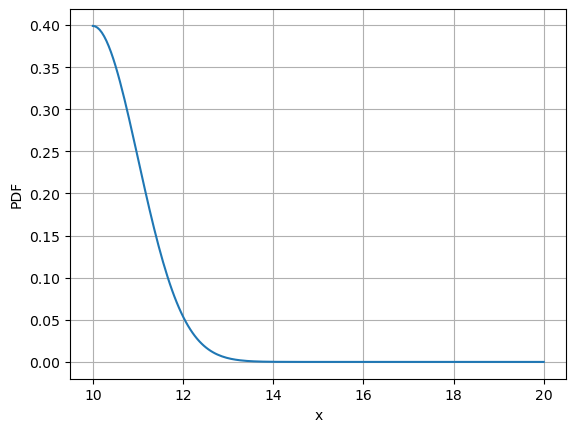

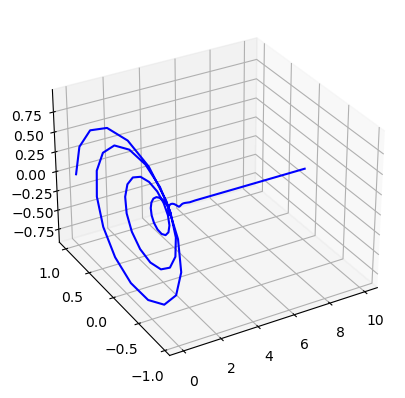

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits import mplot3d

# create the function for probability distributions
def plotNormalPDF_CDF_CHF ():
    mu = 10.0
    sigma = 1.0
    i = complex (0, 1)
    chf = lambda u: np.exp (i * mu * u - sigma * sigma *u * u / 2.0)
    pdf = lambda x: st.norm.pdf (x, mu, sigma)
    cdf = lambda x: st.norm.cdf (x, mu, sigma)
    
    x = np.linspace (10, 20, 200)
    u = np.linspace (0, 10, 250)
    # probability density function
    plt.figure (1)
    plt.plot (x, pdf (x))
    plt.grid ()
    plt.xlabel ('x')
    plt.ylabel ('PDF')
    # cumulative density fucntion
    plt.figure (3)
    ax = plt.axes (projection = '3d')
    chfV = chf (u)
    x = np.real (chfV)
    y = np.imag (chfV)
    ax.plot3D  (u, x, y, 'blue')
    ax.view_init (30, - 120)

plotNormalPDF_CDF_CHF ()


Bivariate normal density fuctions 
We show three bivariate normal density and distribution fucntions, with $X = [X, Y]^T $, and
$$ X \sim \mathcal{N} \left ( \begin {array}{[c][c]} 0 & 1,   \rho \\ 0 & \rho, 1 \end {array} \right) $$
in which the correlation coeeficient is varied. Figures after code below dispalys the functions for $\rho = 0$ (first row),
$\rho = 0.8$ (second row) and $\rho = -0.8$ (third row). Clearly, the correlation coefficien has an impact of the direction in these functions

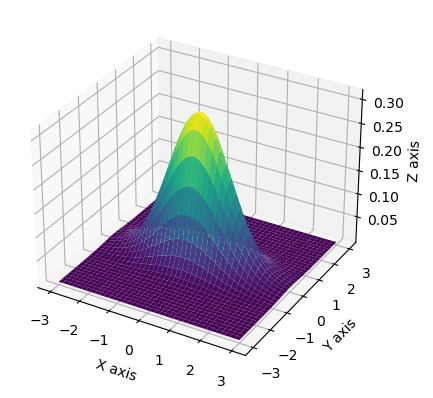

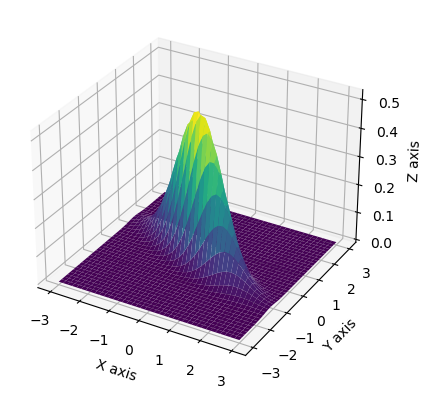

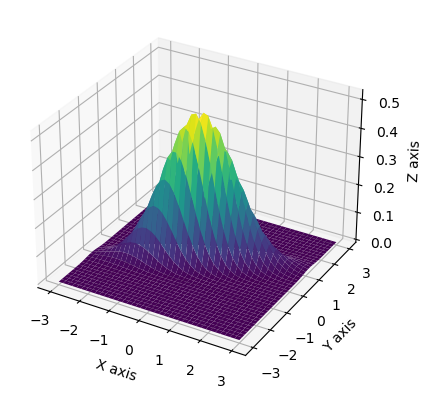

In [3]:
# due bivariate_normal is deleted from package, I add the function
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

# create the function for bivariate probaility function
def BivariateNormalPDFPlot ():
    # number of points in each direction
    n = 40;
    
    # denote the parameters
    mu_1 = 0;
    mu_2 = 0;
    sigma_1 = 1;
    sigma_2 = 0.5;
    rho1 = 0.0
    rho2 = - 0.8
    rho3 = 0.8
    
    # create a grid and a mulrivariate normal
    x = np.linspace (-3.0, 3.0, n)
    y = np.linspace (-3.0, 3.0, n)
    X, Y = np.meshgrid (x, y)
    Z = lambda rho: bivariate_normal(X, Y, sigma_1, sigma_2, mu_1, mu_2, rho*sigma_1*sigma_2)

    # make a 3D plot - rho = 0.0
    fig = plt.figure (1)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z(rho1), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()
    
    # make a 3D plot with rho = - 0.8
    fig = plt.figure (2)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z (rho2), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()
    
    # make a 3D plot with rho = 0.8
    fig = plt.figure (3)
    ax = fig.add_subplot (projection = '3d')
    ax.plot_surface (X, Y, Z (rho3), cmap = 'viridis', linewidth = 0)
    ax.set_xlabel ('X axis')
    ax.set_ylabel ('Y axis')
    ax.set_zlabel ('Z axis')
    plt.show ()

BivariateNormalPDFPlot ()
    

For a given partition, $ 0 = t_0 < t_1 <...< t_m = T $, of the rime interval $ [0, T] $, we make use of elementary processs, $ {g_m(t)}_{m=0}^\infty $,
with $ g_m (t) $ a piecewise constant function, With the help of these elemenrtary processes, we can formally define the $It\hat{o}$ integral as follows
Definition - for any square-integrable adapted process $ g(t) = g(t, \omega) $, with continuous sample paths, the $It\hat(o)$ integral is given by:
$$ I(T) = \int_0^T g(t)dW(t) = \lim_{m \rightarrow \infty} I_m (T), in  L^2 $$

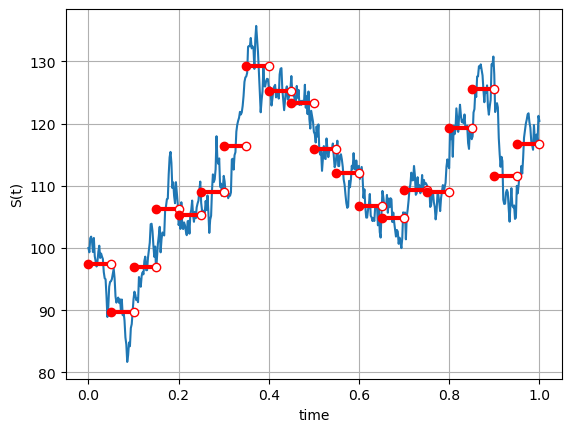

In [4]:
# import required libraries
from scipy.interpolate import interp1d
from scipy import integrate

# create a random step function, approximating a stochastic fucntion g(t) with m = 10
def GeneratePathsGBMABM (NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal (0.0,1.0, [NoOfPaths, NoOfSteps])
    X = np.zeros ([NoOfPaths, NoOfSteps+1])
    time = np.zeros ([NoOfSteps + 1])
    
    X[:,0] = np.log (S_0)
    
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1: Z [:, 1] = (Z[:, i] - np.mean (Z[:, i])) / np.std (Z[:, i])
        X [:, i+1] = X [:, i] + (r - 0.5 * sigma * sigma) * dt + sigma * np.power (dt, 0.5) * Z [:, i]
        time [i+1] = time [i] + dt
    # compute exponent of ABM
    S = np.exp (X)
    paths = {'time':time, 'S':S}
    return paths

def mainCalculation ():
    NoOfPaths = 1
    NoOfSteps = 500
    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100
    
    Paths = GeneratePathsGBMABM (NoOfPaths, NoOfSteps, T, r, sigma, S_0)
    timeGrid = Paths ['time']
    S = Paths ['S']
    
    plt.figure (1)
    plt.plot (timeGrid, np.transpose (S))
    plt.grid ()
    plt.xlabel ('time')
    plt.ylabel ('S(t)')
    
    m = 20
    pathNumber = 0
    f = interp1d (timeGrid, S [pathNumber, :])
    
    for k in range (1, m*T+1):
        tGrid = np.linspace (float ((k-1))/m, float (k)/m, 100)
        g_m =  m * integrate.trapezoid (np.squeeze (f(tGrid)), np.squeeze (tGrid))
        plt.plot (tGrid, g_m * np.ones ([len (tGrid), 1]), '-r', linewidth = 3.0)
        plt.plot (tGrid [0], g_m, 'or')
        plt.plot (tGrid [-1], g_m, 'or', markerfacecolor = [1, 1, 1])
    
mainCalculation ()

In [ ]:
# create function for integrated Brownian motion
def ComputeIntegrals (NoOfPaths, NoOfSteps, T):
    Z = np.random.normal (0.0, 1.0, [NoOfPaths, NoOfSteps])
    W = np.zeros ([NoOfPaths, NoOfSteps+1])
    I1 = np.zeros ([NoOfPaths, NoOfSteps+1])
    I2 = np.zeros ([NoOfPaths, NoOfSteps+1])
    time = np.zeros ([NoOfSteps+1])
    
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1: Z[:, i] = (Z[:,i] - np.mean (Z[:, i])) / np.std (Z[:, i])
        W [:, i+1] = W [:, i] + np.power (dt, 0.5)*Z[:, i]
        I1[:, i+1] = I1[:, i] + W [:,i]*dt
        I2[:, i+1] = I2[:, i] + W[:, i]*(W[:,i+1]-W[:, i])
        time [i+1] = time[i] + dt
    paths = {'time':time, 'W':W, "I1":I1, 'I2':I2}
    return paths

NoOfPaths = 1
NoOfSteps = 1000
T = 1

W_t = ComputeIntegrals (NoOfPaths, NoOfSteps, 1)
timeGrid = W_t['time']
Ws = W_t['W']
intWsds = W_t['I1']
intWsdWs = W_t ['I2']

plt.figure (1)
plt.plot (timeGrid, np.transpose (Ws))
plt.plot (timeGrid, np.transpose (intWsds), 'r')
plt.plot (timeGrid, np.transpose (intWsdWs), 'k')
plt.grid ()
plt.xlabel ('time')
plt.ylabel ('value')
plt.title ('Integrated Brownian Motion paths')

In [ ]:
# import required libraries 
import scipy.stats as st

# create the fucntion
def PlotNormalDensity ():
    muV = [-1.0, -0.5, 0.0, 0.5, 1.0]
    sigmaV = [0.25, 0.75, 1.25, 1.75]
    
    # effect of mu for given sigma
    
    plt.figure (1)
    plt.grid ()
    plt.xlabel ('x')
    x = np.linspace (-5.0, 5.0, 250)
    
    for mu in muV:
        plt.plot (x, st.norm.pdf (x, mu, 1.0))
    plt.legend (['mu = -1.0', 'mu = -0.5', 'mu = 0.0', 'mu = 0.5', 'mu = 1.0'])
    
    # effect of sigma for given mu
    plt.figure (2)
    plt.grid ()
    plt.xlabel ('PDF')
    for sigma in sigmaV:
        plt.plot (x, st.norm.pdf (x, 0, sigma))
    plt.legend (['sigma = 0.25', 'sigma = 0.75', 'sigma = 1.25', 'sigma = 1.75'])
PlotNormalDensity ()

In [ ]:
# create Log normal density
def PlotLogNormalDensity ():
    muV = [-1.0, -0.5, 0.0, 0.5, 1.0]
    sigmaV = [0.25, 0.75, 1.25, 1.75]
    
    # effect of mu for a given sigma
    plt.figure (1)
    plt.grid ()
    plt.xlabel ('x')
    plt.xlabel ('PDF')
    x = np.linspace (0, 5.0, 250)
    
    for mu in muV:
        plt.plot (x, st.lognorm.pdf (x, scale = np.exp (mu), s = 1.0))
    plt.legend (['mu = -1.0', 'mu = -0.5', 'mu = 0.0', 'mu = 0.5', 'mu = 1.0'])
    
    # effect of sigma for a given mu
    plt.figure (2)
    plt.grid ()
    plt.xlabel ('PDF')
    for sigma in sigmaV:
        plt.plot (x, st.lognorm.pdf (x, scale = np.exp (0.0), s = sigma))
    plt.legend (['sigma = 0.25', 'sigma = 0.75', 'sigma = 1.25', 'sigma = 1.75',])

PlotLogNormalDensity ()

In [ ]:
def GeneratePathsGBM (NoOfPaths, NoOpfSteps, T, r, sigma, S_0):
    Z = np.random.normal (0.0, 1.0, [NoOfPaths, NoOfSteps])
    X = np.zeros ([NoOfPaths, NoOfSteps + 1])
    S = np.zeros ([NoOfPaths, NoOfSteps +1])
    time = np.zeros ([NoOfSteps + 1])
    
    X[:, 0] = np.log (S_0)
    
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std (Z[:, i])
        X [:, i+1] = X [:, i] + (r - 0.5 * sigma * sigma) * dt + sigma *\
        np.power (dt, 0.5) * Z [:, i]
        time [i + 1] = time [i] + dt
    # compute exponent of ABM
    S = np.exp (X)
    paths = {'time': time, "S":S}
    return paths

def MainCode ():
    NoOfPaths = 8
    NoOfSteps = 1000
    S_0 = 1
    r = 0.05
    mu = 0.15
    sigma = 0.1 
    T = 10
    
    # money-savings account
    M = lambda t: np.exp (r * t)
    
    # Monte Carlo paths
    pathsQ  = GeneratePathsGBM (NoOfPaths, NoOfSteps, T, r, sigma, S_0)
    S_Q = pathsQ ["S"]
    pathsP = GeneratePathsGBM (NoOfPaths, NoOfSteps, T, mu, sigma, S_0)
    S_P = pathsP ['S']
    time = pathsQ ['time']
    
    # discounted stock paths
    S_Qdisc = np.zeros ([NoOfPaths, NoOfSteps + 1])
    S_Pdisc = np.zeros ([NoOfPaths, NoOfSteps + 1])
    i = 0
    
    for i, ti in enumerate (time):
        S_Qdisc [:, i] = S_Q [:, i]/M (ti)
        S_Pdisc [:, i] = S_P [:, i]/M (ti)
    
    # S(T)/M(T) with stock growing with rate r
    
    plt.figure (1)
    plt.grid ()
    plt.xlabel ('time')
    plt.ylabel ('S(T)')
    eSM_Q = lambda t: S_0 * np.exp (r * t) / M(t)
    plt.plot (time, eSM_Q (time), 'r--')
    plt.plot (time, np.transpose (S_Qdisc), 'blue')
    plt.legend (['E^Q [S(t)/M(t)]', 'paths S(t)/M(t)'])
    
    # S(T)/M(T) with stock growing with rate mu
    plt.figure (2)
    plt.grid ()
    plt.xlabel ('time')
    plt.ylabel ('S(t)')
    eSM_P = lambda t: S_0 * np.exp (mu * t) / M(t)
    plt.plot (time, eSM_P (time), 'r--')
    plt.plot (time, np.transpose (S_Pdisc), 'blue')
    plt.legend (['E^P[S(t)/M(t)]', 'paths S(t)/M(t)'])
    
MainCode ()

In [ ]:
#pathwise estimation for delta and vega for the Black-Scholes model 
# import required libraries 
import enum

# this class defines puts and calls
class OptionType (enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
# Black-Scholes call option price
def BS_Call_Put_Option_Price (CP, S_0, K, sigma, t, T, r):
    K = np.array (K).reshape([len (K), 1])
    d1 = (np.log(S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T - t))
    d2 = d1 - sigma * np.sqrt (t- T)
    if CP == OptionType.CALL:
        value = st.norm.cdf (d1) * S_0 - st.norm.cdf (d2) * K *np.excp (-r * (T - t))
    elif CP == OptionType.CALL:
        value = st.norm.cdg (-d2) * K * np.exp (-r * (T-t)) - st.norm.cdf (-d1)*S_0
    return value

def BS_Delta (CP, S_0, K, sigma, t, T, r):
    K = np.array (K).reshape ([len(K), 1])
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma,  2.0)) * (T-t)) / (sigma * np.sqrt (T-t))
    if CP == OptionType.CALL: 
        value = st.norm.cdf (d1)
    elif CP == OptionType.PUT:
        value = st.norm.cdf (d1) - 1
    return value

def BS_Gamma (S_0, K, sigma, t, T, r):
    K = np.array (K).reshape ([len(K), 1])
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T - t))
    return st.norm.pdf (d1) / (S_0 * digma * np.sqrt (T - t))
    
def BS_Vega (S_0, K, sigma, t, T, r):
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T -t))
    return S_0 * st.norm.pdf (d1) * np.sqrt (T - t)

def GeneratePathsGBMEuler (NoOfPaths, NoOfSteps, T, r, sigma, S_0):
    Z = np.random.normal (0.0, 1.0, [NoOfPaths, NoOfSteps])
    W = np.zeros ([NoOfPaths, NoOfSteps+1])
    
    # Approximation
    S = np.zeros ([NoOfPaths, NoOfSteps + 1])
    S [:, 0] = S_0
    X = np.zeros ([NoOfPaths, NoOfSteps+1])
    X[:, 0] = np.log (S_0)
    time = np.zeros ([NoOfSteps + 1])
    dt = T / float (NoOfSteps)
    for i in range (0, NoOfSteps):
        # mahking sure that smaples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z [:, i] - np.mean(Z[:, i])) / np.std (Z[:, i])
            W [:, i + 1] = W [:, i] + np.power (dt, 0.5) * Z [:, i]
            X [:, i + 1] = X [:, i] + (r - 0.5 * sigma ** 2.0) * dt + sigma * (W [:, i +1] - W [: ,i])
            time [i+1] = time [i] + dt
    # retern S
    paths = {"time": time, "S": np.exp (X)}
    return paths

def EUOptionPriceFromMCPathsGeneralized (Cp, S, K, T, r):
    # S is a vectior of Monte Carlo samples at T
    result = np.zeros ([len (K), 1])
    if CP == OptionType.CALL:
        for (idx, k) in enumerate (K):
            result[idx] = np.exp (-r*T) * np.mean (np.maximum (S-k, 0.0))
    elif CP == OptionTyo.PUT:
        for (idx, k) in enumerate (K):
            result [idx] = np.exp (-r*T)*np.mean (np.maximum (k-S, 0.0))
    return result

def PathwiseDelta (S0, S, K, r, T):
    temp1 = S[:, -1]>K
    return np.exp (-r*T)* np.mean (S[:, -1]/S0*temp1)

def PathwiseVega (S0, S, sigma, K, r, T):
    temp1 = S[:, -1]>K
    temp2 = 1.0/sigma * S [:, -1] * (np.log (S [:, -1]/ S0) - (r + 0.5 * sigma ** 2.0) *T)
    return np.exp (-r*T)* np.mean (temp1 * temp2)

def mainCalculation ():
    CP = OptionType.CALL
    S0 = 1
    r = 0.06
    sigma = 0.3
    T = 1
    K = np.array ([S0])
    t = 0.0
    NoOfSteps = 1000
    delta_Exact = BS_Delta (CP, S0, K, sigma, t, T, r)
    vega_Exact = BS_Vega (S0, K, sigma, t, T, r)
    NoOfPathsV = np.round (np.linspace (5, 20000, 50))
    deltaPathWiseV = np.zeros (len (NoOfPathsV))
    vegaPathWiseV = np.zeros (len (NoOfPathsV))
    
    for (idx, nPaths) in enumerate (NoOfPathsV):
        print ("Running simulation with {0} paths".format (nPaths))
        np.random.seed (3)
        paths1 = GeneratePathsGBMEuler (int (nPaths), NoOfSteps, T, r, sigma, S0)
        S = paths1["S"]
        delta_pathwise = PathwiseDelta (S0, S, K, r, T)
        deltaPathWiseV [idx] = delta_pathwise
        vega_pathwise = PathwiseVega (S0, S, sigma, K, r, T)
        vegaPathWiseV [idx] = vega_pathwise
        
    plt.figure (1)
    plt.grid ()
    plt.plot (NoOfPathsV, deltaPathWiseV, '.-r')
    plt.plot (NoOfPathsV, delta_Exact * np.ones([len (NoOfPathsV), 1]))
    plt.xlabel ('number of paths')
    plt.ylabel ("Delta")
    plt.title ('Convergence of pathwise delta w.r.t number of paths')
    plt.legend (['pathwise est', 'exact'])
    
    plt.figure (2)
    plt.grid ()
    plt.plot (NoOfPathsV, vegaPathWiseV, '.-r')
    plt.plot (NoOfPathsV, vega_Exact * np.ones ([len (NoOfPathsV), 1]))
    plt.xlabel ('number of paths')
    plt.ylabel ("Vega")
    plt.title ("Convergence of pathwise vega w.r.t number of paths")
    plt.legend (["pathwise est", "exact"])
    
mainCalculation ()

In [ ]:
# likelihood ratio estimation for delta and vega for the Black-Scholes model
# Additionaly the method is compared to pathwise differentiation

# import required libraries
import enum

# this class defines puts and calls
class OptionType (enum.Enum):
    CALL = 1.0
    PUT = -1.0
    
# Black-Scholes call option price
def BS_Call_Put_Price (CP, S_0, K, sigma, t, T, r):
    K = np.array (K).reshape ([len(K), 1])
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T -t)) / (sigma * np.sqrt (T -t))
    d2 = d1 - sigma * np.sqrt (T - t)
    if CP == OptionType.CALL: 
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf (d2) * K * np.exp (-r * (T - t))
    elif  CP == OptionType.PUT:
        value = st.norm.cdf (-d) * K * np.exp (-r * (T - t)) - st.norm.cdf (-d1) * S_0
    return value

def BS_Delta (CP, S_0, K, sigma, t, T, r):
    K = np.array (K).reshape ([len (K), 1])
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T - t))
    if CP == OptionType.CALL:
        value = st.norm.cdf (d1)
    elif CP == OptionType.PUT:
        value = st.norm.cdf (d1)-1
    return value
    
def BS_Gamma (S_0, K, sigma, t, T, r):
    K = np.array (K).reshape ([len(K), 1])
    d1 = (np.log (S_0 / K) + (r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T - t))
    return st.norm.pdf (d1) / (S_0 * sigma * np.sqrt (T - t))

def BS_Vega (S_0, K, sigma, t, T, r):
    d1 = (np.log (S_0 / K) + ( r + 0.5 * np.power (sigma, 2.0)) * (T - t)) / (sigma * np.sqrt (T - t))
    return S_0  * st.norm.pdf (d1) * np.sqrt (T - t)

def GeneratePathsGBMEuler (NoOfPaths, NoOfSteos, T, r, sigma, S_0):
    Z = np.random.normal (0.0, 1.0, [NoOfPaths, NoOfSteps])
    W = np.zeros ([NoOfPaths, NoOfSteps + 1])
    
    # approximation
    S = np.zeros ([NoOfPaths, NoOfSteps + 1])
    S[:,0] = S_0
    X = np.zeros ([NoOfPaths, NoOfSteps + 1])
    X[:, 0] = np.log (S_0)

    time = np.zeros ([NoOfSteps + 1])

    dt = T / float (NoOfSteps)

    for i in range (0, NoOfSteps):
       # making sure that samples from a normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean (Z[:, i])) / np.std (Z[:, i])
        W [:, i + 1] = X [:, i] + np.power (dt, 0.5) * Z [:, i]
        X [:, i + 1] = X [:, i] + (r - 0.5*sigma**2.0)* dt + sigma * (W[:, i + 1] - W [:, i])
        time [i + 1] = time [i] + dt
        
    # return S
    paths =  {"time": time, "S": np.exp (X)}
    return paths
        
def EUOptionPriceFromMCPathsGeneralized (CP, S, K, T, r):
    # S is a vector of Monte Carlo samples at T
    
    result = np.zeros ([len (K), 1])
    if CP == OptionType.CALL:
        for (idx, k) in enumerate (K):
            result [idx] = np.exp (-r*T)* np.mean (np.maximum (S-k, 0.0))
    elif CP == OptionType.PUT:
        for (idx, k) in emumerate (K):
            result [idx] = np.exp (-r*T) * np.mean (np.maximum (k-S, 0.0))
    return result

def PathWiseDelta (S0, S, K, r, T):
    temp1 = S[:, -1] > K
    return np.exp (-r*T)* np.mean (S [:, -1]/S0*temp1)

def PathWiseVega (S0, S, sigma, K, r, T):
    temp1 = S [:, -1] > K
    temp2 = 1.0 / sigma * S [:, -1] * (np.log (S[:, -1]/S0) - (r + 0.5*sigma ** 2.0)*T)
    return np.exp (-r*T)*np.mean (temp1 *  temp2)

def LikelihoodDelta (S0, S, K, r, T, sigma):
    temp1 = 1.0 / (S0 * sigma ** 2.0 * T)* np.maximum (S[:, -1] - K, 0)
    beta = np.log (S[:, -1]/S0) - (r - 0.5*sigma ** 2.0) * T
    delta = np.exp (-r*T)* np.mean (temp1* beta)
    return delta

def LikelihoodVega (S0, S, K, r, T, sigma):
    beta = np.log (S[:, -1]/S0) - (r - 0.5 * sigma ** 2.0) * T
    temp1 = -1.0/sigma + 1.0/ (np.power (sigma, 3.0) * T)* (beta ** 2.0) - (1.0 / sigma) * beta
    vega = np.exp (-r * T) * np.mean (np.maximum (S[:, -1] - K, 0) * temp1)
    return vega

def mainCalculation ():
    CP = OptionType.CALL
    S0 = 1
    r = 0.06
    sigma = 0.3
    T = 1
    K = np.array ([S0])
    t = 0.0
    NoOfSteps = 1000
    NoOfPathsMax = 10000
    delta_Exact = BS_Delta (CP, S0, K, sigma, t, T, r)
    vega_Exact = BS_Vega (S0, K, sigma, t, T, r)
    NoOfPathsV = np.round (np.linspace (50, NoOfPathsMax, 20))
    deltaPathWiseV = np.zeros (len (NoOfPathsV))
    deltaLikelihoodV = np.zeros (len (NoOfPathsV))
    vegaPathWiseV = np.zeros (len (NoOfPathsV))
    vegaLikelihoodV = np.zeros (len (NoOfPathsV))
    
    for (idx, nPaths) in enumerate (NoOfPathsV):
        print ("Running simulation with {0} paths".format (nPaths))
        np.random.seed (3)
        paths1 = GeneratePathsGBMEuler (int (nPaths), NoOfSteps, T, r, sigma, S0)
        S = paths1 ["S"]
        
        # Delta ccomputation
        deltaPathWiseV [idx] = PathwiseDelta (S0, S, K, r, T)
        deltaLikelihoodV [idx] = LikelihoodDelta (S0, S, K, r, T, sigma)
        
        # Vega computation
        vegaPathWiseV [idx] = PathWiseVega (S0, S, sigma, K, r, T)
        deltaLikelihoodV [idx] = LikelihoodDelta (S0, S, K, r, T, sigma)
    
    plt.figure (1)
    plt.grid ()
    plt.plot (NoOfPathsV, deltaPathWiseV, '.-r')
    plt.plot (NoOfPathsV, deltaLikelihoodV, '-b')
    plt.plot (NoOfPathsV, delta_Exact * np.ones ([len (NoOfPathsV), 1]))
    plt.xlabel ('number of paths')
    plt.ylabel ('Delta')
    plt.title ('Convergence of pathwise delta w.r.t. number of paths')
    plt.legend (['pathwise est', 'likelihood est', 'exact'])
    
    plt.figure (2)
    plt.grid ()
    plt.plot (NoOfPathsV, vegaPathWiseV, '.-r')
    plt.plot (NoOfPathsV, vegaLikelihoodV, '-b')
    plt.plot (NoOfPathsV, vega_Exact * np.ones ([len (NoOfPathsV), 1]))
    plt.xlabel ('number of paths')
    plt.ylabel ('Vega')
    plt.title ('Convergence of pathwise vega w.r.t. number of paths')
    plt.legend (['pathwise est', 'likelihood est', 'exact'])
    
    # Delta and Vega as a function of maturity
    T = 10.0
    NoOfSteps = 1000
    paths = GeneratePathsGBMEuler (25000, NoOfSteps, T, r, sigma, S0)
    S = paths ["S"]
    time = paths ["time"]
    
    deltaPathWiseV = np.zeros ([len (time), 1])
    deltaLikeliWiseV = np.zeros ([len (time), 1])
    vegaPathWiseV = np.zeros ([len (time), 1])
    vegaLikelihoodV = np.zeros ([len (time), 1])
    vegaExactV = np.zeros ([len (time), 1])
    deltaExactV = np.zeros ([len (time), 1])
    
    for (i, T) in enumerate (time):
        if i == 0:
            continue 
        S_t = S [:, :i+1]
        
        # Delta - - pathwise
        deltaPathWiseV [i] = PathwiseDelta (S0, S_t, K, r, T)
        deltaLikeliWiseV [i] = LikelihoodDelta (S0, S_t, K, r, T, sigma)
        deltaExactV [i]= BS_Delta (CP, S0, K, sigma, t, T, r)
        
        # Vega -- pathwise
        vegaPathWiseV [i] = PathwiseVega (S0, S_t, sigma, K, r, T)
        vegaLikelihoodV [i] = LikelihoodVega (S0, S_t, K, r, T, sigma)
        vega_Exact = BS_Vega (S0, K, sigma, t, T, r)
        vegaExactV [i] = vega_Exact
    plt.figure (3)
    plt.grid ()
    plt.plot (time, deltaExactV)
    plt.plot (time, deltaPathWiseV)
    plt.plot (time, deltaLikeliWiseV)
    plt.legend (['Exact', 'Pathwise Est', ' Likelihood est'])
    plt.title ('Estimation of Delta')
    plt.xlabel ('Time')
    plt.ylabel ("Delta")
    
    plt.figure (4)
    plt.grid ()
    plt.plot (time, vegaExactV, 1.5)
    plt.plot (time, vegaPathWiseV, 1.5)
    plt.plot (time, vegaLikelihoodV, 1.5)
    plt.legend (['Exact', 'Pathwise est', 'Likelihood est'])
    plt.title ('Estimation of Vega')
    plt.xlabel ('Time')
    plt.ylabel ('Vega')
    
mainCalculation ()

In [ ]:
# The Heston model and pricing of forward start options
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import enum
import scipy.optimize as optimize

# set i = imaginary number
i = complex (0.0, 1.0)

# this class defines puts and calls
class OptionType (enum.Enum):
    CALL = 1.0
    PUT = - 1.0
    
def CallPutOptionPriceCOSMthd_FrwdStart (cf, CP, r, T1, T2, K, N, L):
    # cf - Chrarcterictic function
    # CP - C for call amd P for put
    # S0 - initial stock price
    # r - interest rate (constant)
    # tau - time to maturity
    # K - list of strikes 
    # N - number of expansion terms
    # L - size of trunctation domain (typ.: L = 8 or L = 10)
    
    tau = T2 - T1
    
    # reshape K to become a column vector 
    if K is not np.array:
        K = np.array (K).reshape ([len (K), 1])
        
    # adjust strike price 
    K = K + 1.0
    
    # assigning i = sqrt (-1)
    i = complex (0.0, 1.0)
    x0 = np.log (1.0 / K)
    
    # truncation domain 
    a = 0.0 - L * np.sqrt (tau)
    b = 0.0 + L * np.sqrt (tau)
    
    # summation from k = 0 to k = N - 1 
    k = np.linspace (0, N - 1, N).reshape ([N, 1])
    u = k * np.pi / (b - a);
    
    # determine coefficients for put prices
    H_k = CallPutCoefficients(CP,a,b,k)
    mat = np.exp(i * np.outer((x0 - a) , u))
    temp = cf(u) * H_k
    temp[0] = 0.5 * temp[0]
    value = np.exp(-r * T2) * K * np.real(mat.dot(temp))
    return value

# Determine coefficients for put and call prices
def CallPutCoefficients(CP,a,b,k):
    if CP==OptionType.CALL:
        c = 0.0
        d = b
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        if a < b and b < 0.0:
            H_k = np.zeros([len(k),1])
        else:
            H_k = 2.0 / (b - a) * (Chi_k - Psi_k)
    elif CP==OptionType.PUT:
        c = a
        d = 0.0
        coef = Chi_Psi(a,b,c,d,k)
        Chi_k = coef["chi"]
        Psi_k = coef["psi"]
        H_k = 2.0 / (b - a) * (- Chi_k + Psi_k)
    return H_k

def Chi_Psi(a,b,c,d,k):
    psi = np.sin(k * np.pi * (d - a) / (b - a)) - np.sin(k * np.pi * (c - a)/(b - a))
    psi[1:] = psi[1:] * (b - a) / (k[1:] * np.pi)
    psi[0] = d - c
    chi = 1.0 / (1.0 + np.power((k * np.pi / (b - a)) , 2.0))
    expr1 = np.cos(k * np.pi * (d - a)/(b - a)) * np.exp(d) - np.cos(k * np.pi * (c - a) / (b - a)) * np.exp(c)
    expr2 = k * np.pi / (b - a) * np.sin(k * np.pi * (d - a) / (b - a)) - k * np.pi / (b - a) * np.sin(k * np.pi * (c - a) / (b - a)) * np.exp(c)
    chi = chi * (expr1 + expr2)
    value = {"chi":chi,"psi":psi }
    return value

# Forward start Black-Scholes option price
def BS_Call_Option_Price_FrwdStart(K,sigma,T1,T2,r):
    if K is list:
        K = np.array(K).reshape([len(K),1])
    K = K + 1.0
    tau = T2 - T1
    d1 = (np.log(1.0 / K) + (r + 0.5 * np.power(sigma,2.0))* tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    value = np.exp(-r*T1) * st.norm.cdf(d1) - st.norm.cdf(d2) * K * np.exp(-r * T2)
    return value

# implied volatility for the forward start call option
def ImpliedVolatility_FrwdStart (marketPrice, K, T1, T2, r):
    # To dertermine initiasl volatility we define a grid for sigma
    # and interpolate on the inverse function
    sigmaGrid = np.linspace (0, 2, 200)
    optPriceGrid = BS_Call_option_price_FrwdStart (K, sigmaGrid, T1, T2, r)
    sigmaInitial = np.interp (marketPrice, optPriceGrid,sigmaGrid)
    print ("Initial volatility = {0}".format (sigmaInitial))
    
    # use already  determined input for the local-search (final tuning)
    func = lambda sigma: np.power (BS_Call_Option_Price_FrwdStart (K, sigma, T1, T2, r) - marketPrice, 1.0)
    impliedVol = optimize.newton (func, sigmaInitial, tol = 1e-15)
    print ("Final volatility = {0}".format (impliedVol))
    return impliedVol

def ChFHestonModelForwardStart (r, T1, T2, kappa, gamma, vbar, c0, rho):
    i = complex (0.0, 1.0)
    tau = T2 - T1
    D1 = lambda u: np.sqrt (np.power (kappa - gamma * rho * i * u, 2) + (u * u + i * u) * gamma * gamma)
    g = lambda u: (kappa - gamma * rho * i * u - D1 (u)) / (kappa - gamma * rho * i * u + D1 (u))
    C = lambda u: (1.0 - np.exp (- D1 (u) * tau)) / (gamma * gamma * (1.0 - g(u) * np.exp (D1(u) * tau))) * (kappa - gamma * rho * i * u - D1(u))
    
    # note that we exclude the term -r*tau, as the discounting is performed in the COS method
    A = lambda u: r * i * u * tau + kappa * vbar * tau / gamma / gamma * (kappa - gamma * rho * i * u - D1 (u))\
        - 2 * kappa * vbar / gamma / gamma * np.log ((1.0 - g(u) * np.exp (-D1(u) * tau)) / (1.0 - g(u)))
    c_bar = lambda t1,t2: gamma * gamma / (4.0*kappa) * (1.0 - np.exp (-kappa * (t2 - t1)))
    delta = 4.0 * kappa * vbar / gamma / gamma
    kappa_bar = lambda t1,t2: 4.0 * kappa * v0 * np.exp (-kappa * (t2 - t1)) / (gamma * gamma * (1.0 - np.exp (- kappa * (t2 - t1))))
    term1 = lambda u: A(u) + C(u) * c_bar (0.0, T1) * kappa_bar (0.0, T1) / (1.0 - 2.0 * C(u) * c_bar (0.0, T1))
    term2 = lambda u: np.power (1.0 / (1.0 - 2.0 * C(u) * c_bar (0.0, T1)), 0.5 * delta)
    cf = lambda u: np.exp (term1 (u)) * term2 (u)
    return cf                                                                            
                                                                                
def mainCalculation ():
    CP = OptionType.CALL
    r = 0.0
    TMat1 = [[1.0, 3.0], [2.0, 4.0], [3.0, 5.0], [4.0, 6.0]]
    Tmat2 = [[1.0, 2.0], [1.0, 3.0], [1.0, 4.0], [1.0, 5.0]]                                                                               
    K = np.linspace (-0.4, 4.0, 50)                                                                            
    K = np.array (K).reshape ([len(K), 1])
    
    N = 500
    L = 10
                                                                          
    # Heston model parameters
    kappa = 0.6                                                                            
    gamma = 0.2                                                                            
    vbar = 0.1                                                                            
    rho = - 0.5
    v0 = 0.05                               
                                                                                
    plt.figure (1)                                                                            
    plt.grid ()                                                                            
    plt.xlabel ('strike, K')                                                                            
    plt.ylabel ('implied volatility')                                                                            
    legend = []
    for T_pair in TMat1:
        T1 = T_pair [0]                                                                      
        T2 = T_pair [1]                                                                      
        cf = ChFHestonModelForwardStart (r, T1, T2, kappa, gamma, vbar, v0, rho)                                                                      
        # Forward-start option by the COS method                                                                      
        valCOS = CallPutOptionPriceCOSMthd_FrwdStart (cf, CP, r, T1, T2, K, N, L)                                                                      
        # implied volatilities
        IV = np.zeros ([len (K), 1])  
        for idx in range(0,len(K)):
            IV[idx] = ImpliedVolatility_FrwdStart(valCOS[idx],K[idx],T1,T2,r)
        plt.plot(K,IV*100.0)
        legend.append('T1={0} & T2={1}'.format(T1,T2))
    plt.legend(legend)
    plt.figure(2)
    plt.grid()
    plt.xlabel('strike, K')
    plt.ylabel('implied volatility')
    legend = []
    for T_pair in TMat2:
        T1= T_pair[0]
        T2= T_pair[1]
        cf = ChFHestonModelForwardStart(r,T1,T2,kappa,gamma,vbar,v0,rho)
        # Forward-start option by the COS method
        valCOS = CallPutOptionPriceCOSMthd_FrwdStart(cf,CP,r,T1,T2,K,N,L)
        # Implied volatilities
        IV =np.zeros([len(K),1])
        for idx in range(0,len(K)):
            IV[idx] = ImpliedVolatility_FrwdStart(valCOS[idx],K[idx],T1,T2,r)
        plt.plot(K,IV*100.0)
        legend.append('T1={0} & T2={1}'.format(T1,T2))
    plt.legend(legend)
    
mainCalculation()                                                                      